<h1><b>Importing the necessary libraries</b></h1>

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, TruncatedSVD
from nltk.stem.porter import PorterStemmer
import nltk

<h1><b>Importing and exploring the data</b></h1>

In [3]:
data = pd.read_csv('twitter_training.csv')
vdata = pd.read_csv('twitter_validation.csv')

In [4]:
column_names = ['ID', 'platform', 'type','review']
vdata.columns = column_names


In [5]:
vdata.head()

,ID,platform,type,review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
column_names = ['ID', 'platform', 'type','review']
data.columns = column_names

In [7]:
data.head()

,ID,platform,type,review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
data.describe

<bound method NDFrame.describe of          ID     platform      type  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                  review  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac wind

In [9]:
data.dropna(axis=0, subset=['review'], inplace=True)
vdata.dropna(axis=0, subset=['review'], inplace=True)

In [10]:
data.isnull().any()

ID          False
platform    False
type        False
review      False
dtype: bool

In [11]:
vdata.isnull().any()

ID          False
platform    False
type        False
review      False
dtype: bool

In [12]:
data.shape

(73995, 4)

In [13]:
vdata.shape

(999, 4)

In [2]:
#checking the distribution of reviews per platform, appearantly the distribution is uniform which means there are almost same number 
# of reviews per platform 

<Axes: >

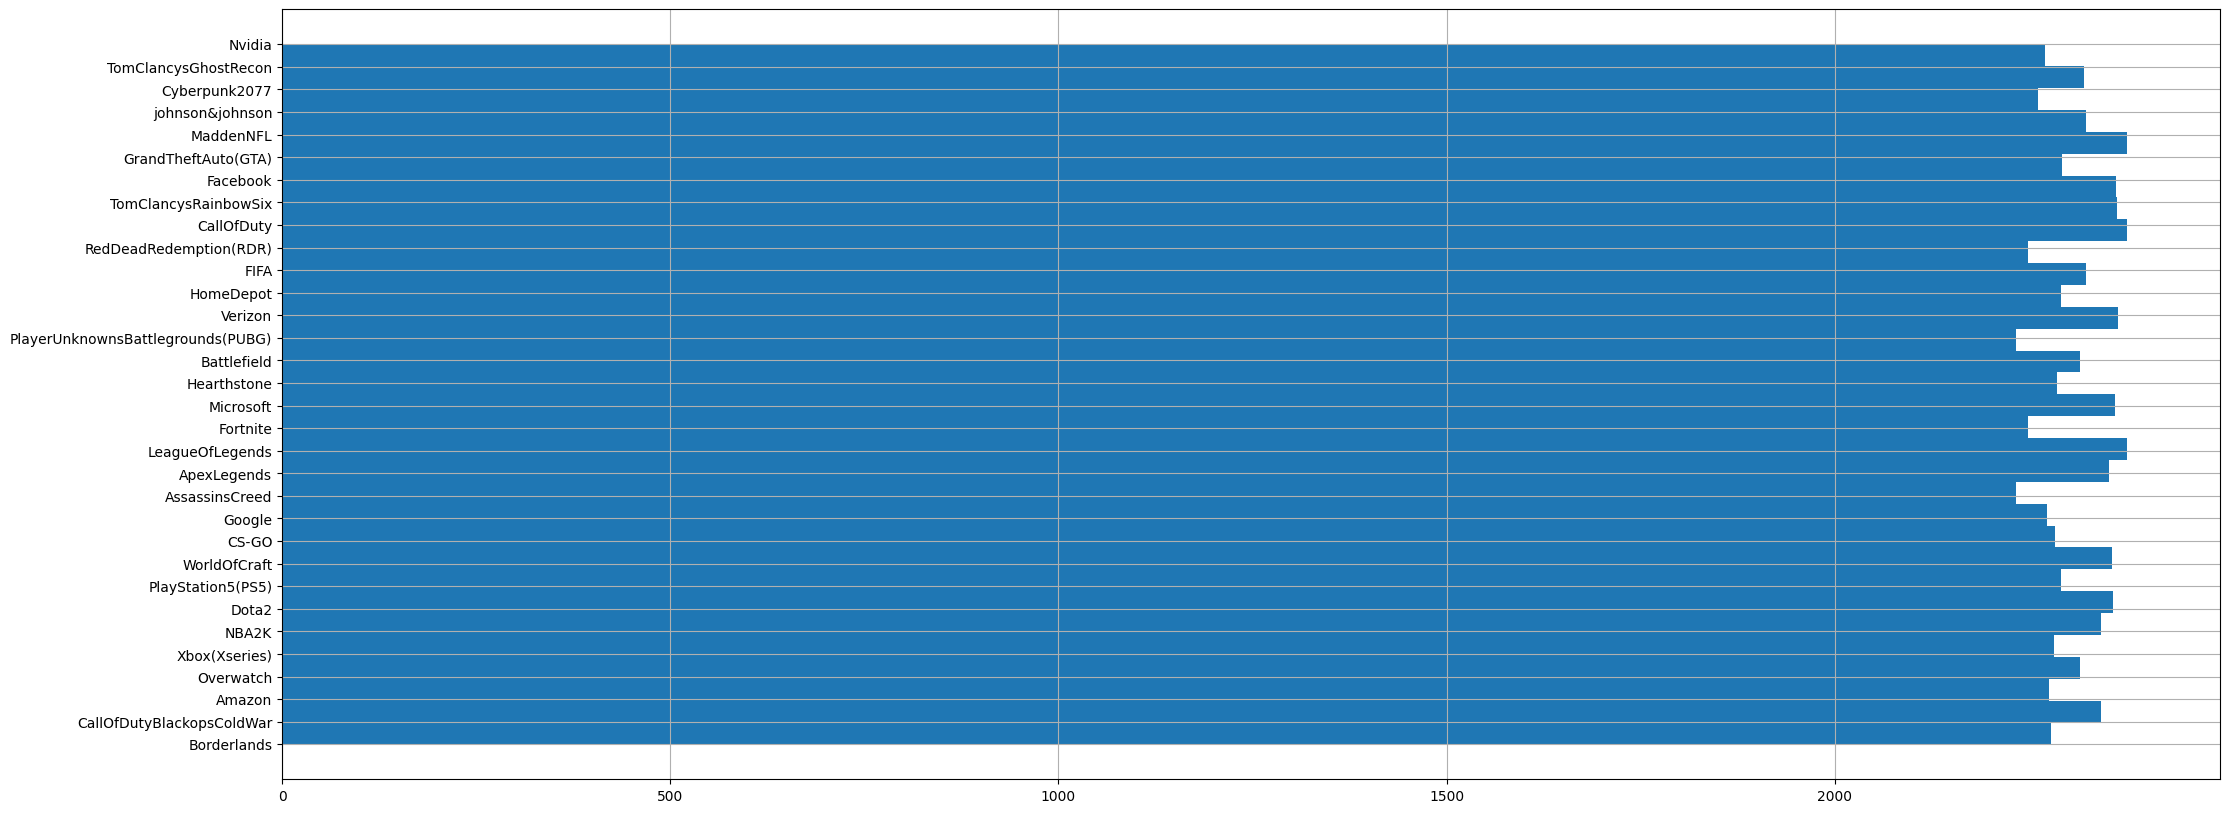

In [14]:
data["platform"].hist(orientation='horizontal', bins=32, figsize=(25,10))

In [3]:
# as it is apparant every operation we do it for the training set we mirror it on the test set 

In [15]:
data.drop(['ID'], axis=1, inplace=True)
data.head()

,platform,type,review
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [16]:
vdata.drop(['ID'], axis=1, inplace=True)
vdata.head()

,platform,type,review
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


<Axes: >

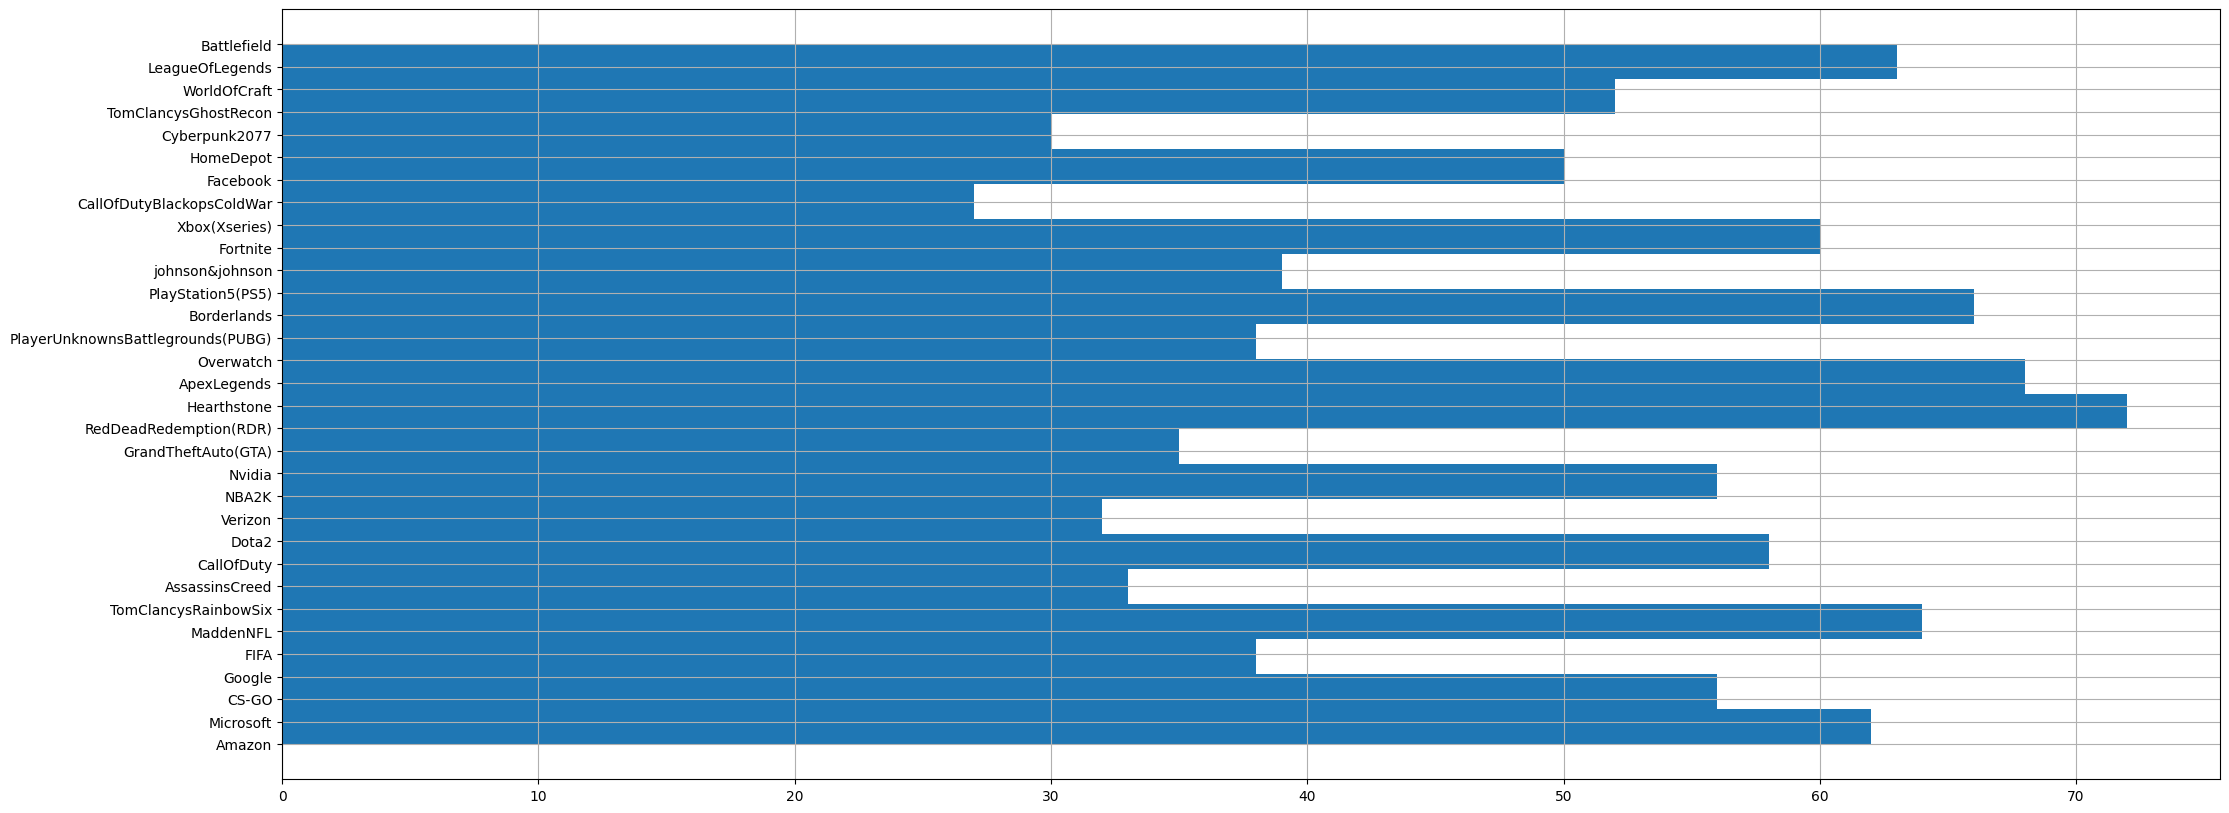

In [17]:
vdata["platform"].hist(orientation='horizontal', bins=20, figsize=(25,10))

In [18]:
vdata['platform'].unique()

array(['Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA', 'MaddenNFL',
       'TomClancysRainbowSix', 'AssassinsCreed', 'CallOfDuty', 'Dota2',
       'Verizon', 'NBA2K', 'Nvidia', 'GrandTheftAuto(GTA)',
       'RedDeadRedemption(RDR)', 'Hearthstone', 'ApexLegends',
       'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)', 'Borderlands',
       'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'Facebook',
       'HomeDepot', 'Cyberpunk2077', 'TomClancysGhostRecon',
       'WorldOfCraft', 'LeagueOfLegends', 'Battlefield'], dtype=object)

In [19]:
data['platform'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [4]:
# here we are assuring that every category found into the validation set is present in the training set that is essential for 
# the comming encoding and training steps 

In [20]:
truthy = set(vdata['platform'].str.lower()).issubset(set(data['platform'].str.lower()))
truthy

True

In [21]:
truthy_2 = set(vdata['type'].str.lower()).issubset(set(data['type'].str.lower()))
truthy_2

True

In [22]:
cat_data = data['platform'].copy()
y_train = data['type'].copy()
vect_data = data['review'].copy()



cat_vdata = vdata['platform'].copy()
y_test = vdata['type'].copy()
vect_vdata = vdata['review'].copy()


In [5]:
# here i transformed the categories found into the platform column into columns and then for each record we put a one in the corresponding column 

In [23]:
cat_data = pd.get_dummies(cat_data, columns=['platform'], prefix='', prefix_sep='')
cat_data = cat_data.astype(int)
cat_data.head()

,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,Cyberpunk2077,Dota2,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
cat_vdata = pd.get_dummies(cat_vdata, columns=['platform'], prefix='', prefix_sep='')
cat_vdata = cat_vdata.astype(int)

In [8]:
# here starts the NLP operations on the review column 
# first operation stemming : which is removing prefixes and suffixes from all the words in each text in the review field 
# second noise removal : which means removing the noisy parts of the texts that do not provide any information about the nature 
# of the review like html tags and  special characters
# and then third : removing stopwords like conjunctions and pronouns and removing punctuations  

<h1><b>NLP operations starts here</b></h1>

In [25]:
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
    


def noiseremoval_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '', text)
  return text

data['review'] = data['review'].apply(noiseremoval_text)
vdata['review'] = vdata['review'].apply(noiseremoval_text)

data['review'] = data['review'].apply(stemmer)
vdata['review'] = vdata['review'].apply(stemmer)

C:\Users\yboyk\AppData\Local\Temp\ipykernel_6532\1830185047.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [26]:
data.head()

,platform,type,review
0,Borderlands,Positive,"i am come to the border and i will kill you all,"
1,Borderlands,Positive,"im get on borderland and i will kill you all,"
2,Borderlands,Positive,"im come on borderland and i will murder you all,"
3,Borderlands,Positive,im get on borderland 2 and i will murder you m...
4,Borderlands,Positive,"im get into borderland and i can murder you all,"


In [27]:
vdata.head()

,platform,type,review
0,Amazon,Neutral,bbc new - amazon boss jeff bezo reject claim c...
1,Microsoft,Negative,@microsoft whi do i pay for word when it funct...
2,CS-GO,Negative,"csgo matchmak is so full of closet hacking, it..."
3,Google,Neutral,now the presid is slap american in the face th...
4,FIFA,Negative,hi @eahelp i’v had madelein mccann in my cella...


In [28]:
stop_wr=set(stopwords.words('english'))

def remove_punc_stopword(text):

    remove_punc = [word for word in text.lower() if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    remove_punc = [word for word in remove_punc.split() if word not in stop_wr]
    remove_punc = ' '.join(remove_punc)
    return remove_punc
    

In [29]:
data['review'] = data['review'].apply(remove_punc_stopword)
data.head()

,platform,type,review
0,Borderlands,Positive,come border kill
1,Borderlands,Positive,im get borderland kill
2,Borderlands,Positive,im come borderland murder
3,Borderlands,Positive,im get borderland 2 murder
4,Borderlands,Positive,im get borderland murder


In [30]:
vdata['review'] = vdata['review'].apply(remove_punc_stopword)
vdata.head()

,platform,type,review
0,Amazon,Neutral,bbc new amazon boss jeff bezo reject claim com...
1,Microsoft,Negative,microsoft whi pay word function poorli samsung...
2,CS-GO,Negative,csgo matchmak full closet hacking truli aw game
3,Google,Neutral,presid slap american face realli commit unlaw ...
4,FIFA,Negative,hi eahelp i’v madelein mccann cellar past 13 y...


<h1><b>converting the processed text into numbers </b></h1>

In [9]:
# here we use the countvectorizer object to convert the review column into a sparse matrix

In [31]:
cv = CountVectorizer(ngram_range=(1,1),max_features = 1500)

data = cv.fit_transform(vect_data)
vdata = cv.transform(vect_vdata)
print("Shape of the sparse matrix: ", data.shape)
print("Shape of the sparse matrix: ", vdata.shape)

Shape of the sparse matrix:  (73995, 1500)
Shape of the sparse matrix:  (999, 1500)


In [32]:
newdata_vect = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())

newvdata_vect = pd.DataFrame(vdata.toarray(), columns=cv.get_feature_names_out())

newdata_vect.reset_index(drop=True, inplace=True)
cat_data.reset_index(drop=True, inplace=True)


newvdata_vect.reset_index(drop=True, inplace=True)
cat_vdata.reset_index(drop=True, inplace=True)

last_data = pd.concat([newdata_vect, cat_data], axis=1) 
last_vdata = pd.concat([newvdata_vect, cat_vdata], axis=1) 

print(last_data.isnull().any().sum())
print(last_vdata.isnull().any().sum())

0
0


<h1><b>Importing the necessary libraries</b></h1>

In [33]:
mnb = MultinomialNB()

mnb.fit(last_data,y_train)
predmnb = mnb.predict(last_vdata)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print(classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 91  26  20  34]
 [ 16 189  28  33]
 [ 28  48 165  44]
 [ 15  28  39 195]]
Score: 64.06
              precision    recall  f1-score   support

  Irrelevant       0.61      0.53      0.57       171
    Negative       0.65      0.71      0.68       266
     Neutral       0.65      0.58      0.61       285
    Positive       0.64      0.70      0.67       277

    accuracy                           0.64       999
   macro avg       0.64      0.63      0.63       999
weighted avg       0.64      0.64      0.64       999



In [34]:
lr_cv_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(last_data, y_train)

print(classification_report(y_test, lr_cv_lg.predict(last_vdata)))

              precision    recall  f1-score   support

  Irrelevant       0.73      0.61      0.66       171
    Negative       0.71      0.82      0.76       266
     Neutral       0.75      0.67      0.71       285
    Positive       0.71      0.75      0.73       277

    accuracy                           0.72       999
   macro avg       0.72      0.71      0.72       999
weighted avg       0.72      0.72      0.72       999



C:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from itertools import product

max_depth = [10, 25, 50, 100, 250, 500]

min_sample = [1,2,3,4,5]

combinations = list(product(max_depth, min_sample))

def get_acc(c, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = c[0],min_samples_leaf = c[1])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

arr2 = []
for c in combinations :
    acc = get_acc(c,last_data, last_vdata, y_train, y_test)
    print("the accuracy for " + str(c[0]) + " ," + str(c[1]) + " is : " + str(acc))
    arr2.append([c,acc])


best_tree_size = max(arr2, key=lambda x: x[1])[0]
print("------------------------------------------")
print("| the best tree size is : " + str(best_tree_size) + " |")
print("------------------------------------------")

the accuracy for 10 ,1 is : 0.42242242242242245
the accuracy for 10 ,2 is : 0.4214214214214214
the accuracy for 10 ,3 is : 0.4214214214214214
the accuracy for 10 ,4 is : 0.42042042042042044
the accuracy for 10 ,5 is : 0.4214214214214214
the accuracy for 25 ,1 is : 0.5675675675675675
the accuracy for 25 ,2 is : 0.5725725725725725
the accuracy for 25 ,3 is : 0.5705705705705706
the accuracy for 25 ,4 is : 0.5675675675675675
the accuracy for 25 ,5 is : 0.5595595595595596
the accuracy for 50 ,1 is : 0.7657657657657657
the accuracy for 50 ,2 is : 0.7657657657657657
the accuracy for 50 ,3 is : 0.7617617617617618
the accuracy for 50 ,4 is : 0.7567567567567568
the accuracy for 50 ,5 is : 0.7347347347347347
the accuracy for 100 ,1 is : 0.8808808808808809
the accuracy for 100 ,2 is : 0.8768768768768769
the accuracy for 100 ,3 is : 0.8768768768768769
the accuracy for 100 ,4 is : 0.8688688688688688
the accuracy for 100 ,5 is : 0.8488488488488488
the accuracy for 250 ,1 is : 0.8898898898898899
the a